## Group 1: Week 12

# 'Game of Thrones' Story Through a Data Science Narrative

****

In [1]:
# import required libraries
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Load Data

In [2]:
# set the path to the data files directory
home = os.getcwd()
the_path = home + '/Data/'

# read the csv files into dataframes
data_list = ['battles', 'deaths', 'predictions']

for data in data_list:
    file_path = the_path + str(data) + '.csv'
    the_code = str(data) + ' = pd.read_csv(file_path)'
    exec(the_code)

### Review the Battles

In [3]:
# take a peek at the battle data
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


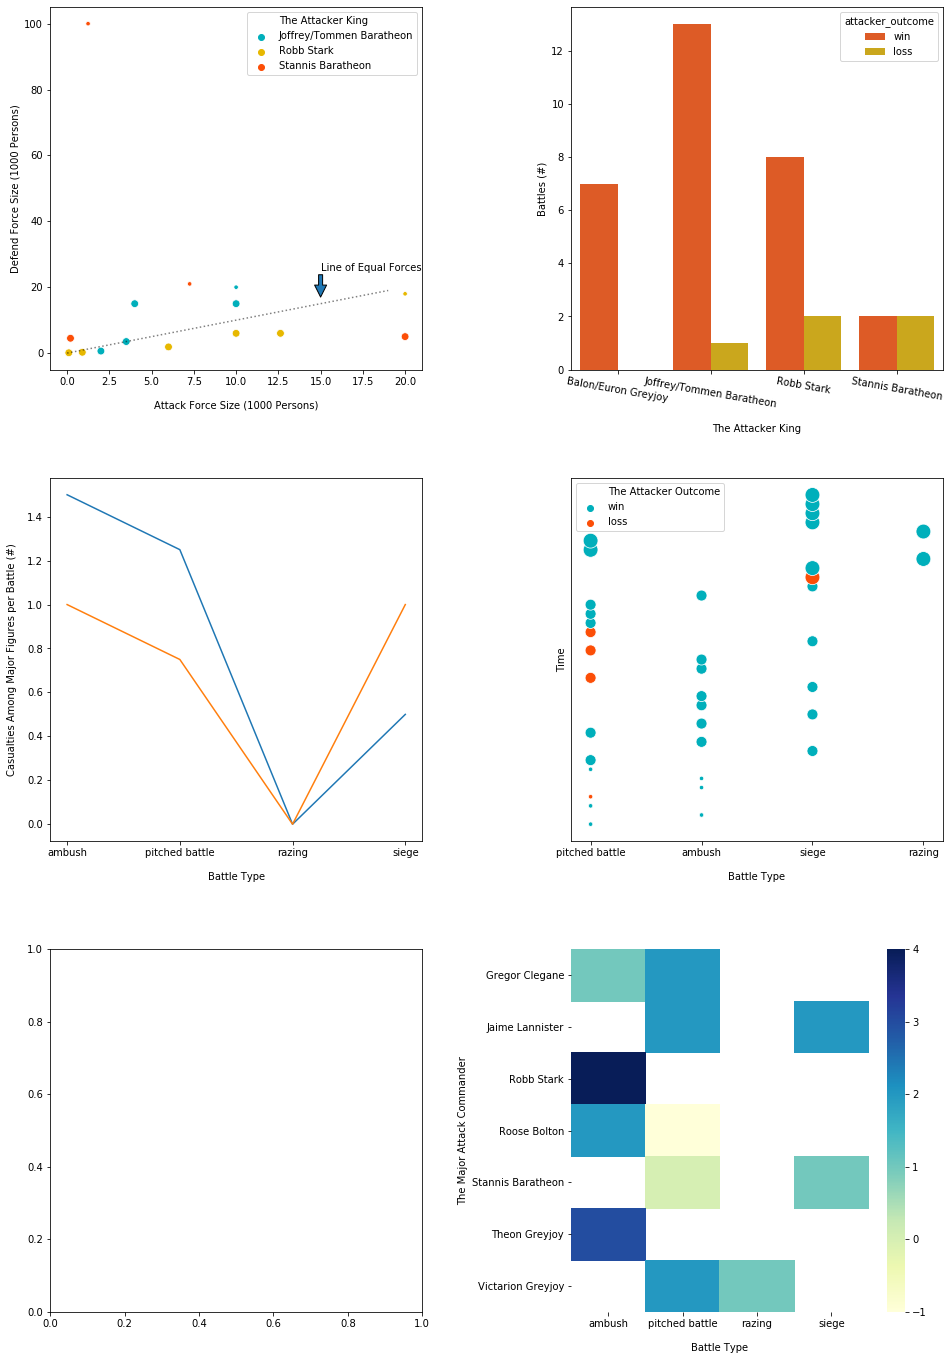

In [4]:
# set the space for 4 plot''s
figs, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,24))
plt.subplots_adjust(hspace=0.3, wspace=0.4)

# ----------------------------------------------------------------------
# Upper Left Plot
# compare the ratio of attack to defend force sizes
# ----------------------------------------------------------------------
# clean and preprocess battles data regarding the attacker/defender force sizes
# and also the outcome for the attacker
battles_pre = battles.copy()
battles_pre = battles_pre.dropna(subset=['attacker_size', 'defender_size'])
battles_pre.attacker_outcome.replace(['win', 'loss'], [3, 1], inplace=True)

# normalize the force sizes
battles_pre['attacker_size'] = battles_pre['attacker_size'].div(1000)
battles_pre['defender_size'] = battles_pre['defender_size'].div(1000)

# draw the plot
sns.scatterplot(data=battles_pre, x='defender_size', y='attacker_size', hue='attacker_king',
                s=20*battles_pre['attacker_outcome'], ax=axes[0,0],
                palette = ('#00AFBB', '#E7B800', '#FC4E07'))

# draw the equality line
x = np.arange(min(battles_pre.attacker_size.max(), battles_pre.defender_size.max()))
axes[0,0].plot(x, x, ':', color='black', alpha=.5)
axes[0,0].annotate('Line of Equal Forces', xy=(15, 17), xytext=(15, 25), arrowprops=dict())

# set the labels and the legend
lgnd1 = axes[0,0].legend()
lgnd1.texts[0].set_text('The Attacker King')
axes[0,0].set_xlabel('Attack Force Size (1000 Persons)', labelpad=14)
axes[0,0].set_ylabel('Defend Force Size (1000 Persons)')



# ----------------------------------------------------------------------
# Upper Right Plot
# compare the ratio of win to attack for the kings
# ----------------------------------------------------------------------
# preprocess the battles data regarding the number of attacks per kings
# and the attacks' outcomes
battles_pre = battles.copy()
battles_pre = battles_pre.groupby(['attacker_king', 'attacker_outcome']) \
                                  ['attacker_king'].count().reset_index(name='attacks')

# draw the plot    
sns.catplot(x='attacker_king', y='attacks', hue='attacker_outcome', ax=axes[0,1],
            kind='bar', data=battles_pre, palette = ('#FC4E07', '#E7B800'), ci=None)

# set the labels and the legend
#legend2 = axes[0,1].legend()
#legend2.get_texts()[0].set_text('The Attacker Outcome')
axes[0,1].set_xlabel('The Attacker King', labelpad=14)
axes[0,1].set_ylabel('Battles (#)')
axes[0,1].tick_params(axis='x', labelrotation=-10)

# close the extra subplot space, created by catplot in plt environment
plt.close(2)



# ----------------------------------------------------------------------
# Middle Left Plot
# compare the number of major casualties among different types of battle
# ----------------------------------------------------------------------
# preprocess the battles data for the number of casualties per battle type
battles_pre = battles.copy()
battles_pre = battles_pre.groupby(['battle_type'])['major_death','major_capture'].sum().reset_index()
# normalize the casualties by the number of battle types
battles_pre['major_death'] /= 4
battles_pre['major_capture'] /= 4

# plot the number of deaths and captureds for each type of battle
sns.lineplot(x='battle_type', y='major_death', ax=axes[1,0], markers=True, dashes=False, data=battles_pre)
sns.lineplot(x='battle_type', y='major_capture', ax=axes[1,0], markers=True, dashes=False, data=battles_pre)

# set the labels and the legend
#lgnd3 = axes[1,0].legend()
#lgnd3.texts[0].set_text('Major Figures')
axes[1,0].set_xlabel('Battle Type', labelpad=14)
axes[1,0].set_ylabel('Casualties Among Major Figures per Battle (#)', labelpad=10)



# ----------------------------------------------------------------------
# Middle Right Plot
# compare the success among different battle types
# ----------------------------------------------------------------------
# clean and preprocess the battles data for the battle year
battles_pre = battles.copy()
battles_pre.year.replace([298, 299, 300], [1, 6, 11], inplace=True)

sns.scatterplot(data=battles_pre, x='battle_type', y='battle_number', hue='attacker_outcome',
                s=20*battles_pre['year'], ax=axes[1,1],
                palette = ('#00AFBB', '#FC4E07'))

# set the labels and the legend
lgnd4 = axes[1,1].legend()
lgnd4.texts[0].set_text('The Attacker Outcome')
axes[1,1].set_xlabel('Battle Type', labelpad=14)
axes[1,1].set_ylabel('Time')
axes[1,1].set_yticks([])



# ----------------------------------------------------------------------
# Middle Left Plot
# compare the conflict rate & outcome for the attacker among the houses
# ----------------------------------------------------------------------
# clean and preprocess the battles data for the [attacker_1/defender_1]
# houses and also the attacker_outcome
battles_pre = battles.copy()
battles_pre = battles_pre.dropna(subset=['attacker_king', 'attacker_1', 'defender_1'])
battles_pre.attacker_outcome.replace(['win', 'loss'], [1, -1], inplace=True)



# ----------------------------------------------------------------------
# Lower Right Plot
# compare the performance of the commanders in different type of battles
# ----------------------------------------------------------------------
# clean and preprocess the battles data for the attacker commanders
# and the attacker outcome
battles_pre = battles.copy()
battles_pre = battles_pre.dropna(subset=['attacker_commander'])
battles_pre.attacker_outcome.replace(['win', 'loss'], [1, -1], inplace=True)
# there's an extra space at the end of the 'attacker_commander' string
# at the 14th row of the dataframe that distorts our calculation
# the following line is to fix it
battles_pre.iloc[13, battles_pre.columns.get_loc('attacker_commander')] = \
battles_pre.loc[13]['attacker_commander'][:-1]

# make a clean list of attacker commanders
attack_commanders = battles_pre.attacker_commander.to_list()
commanders_raw = []
for commander in attack_commanders:
    commanders_raw.append(commander.split(', '))
commanders = [item for sublist in commanders_raw for item in sublist]
# remove the commanders with less than 3 appearances in the battles
commanders_major = [commander for commander in commanders if commanders.count(commander) > 2]
# remove repetitive names
commanders = list(set(commanders_major))

# reduce the 'attacker_commander' list of commanders with the major commander
for value in battles_pre['attacker_commander']:
    # this check-bit is added to ignore the lowest rank major commander,
    # in case there are 2 major commanders
    # and to remove the battles without any major commanders being involved
    check = False
    for commander in commanders:
        if commander in value and not check:
            battles_pre.loc[battles_pre.attacker_commander == value, 'attacker_commander'] = commander
            check = True 
    if not check:
        battles_pre.drop(battles_pre.loc[battles_pre['attacker_commander'] == value].index, inplace=True)

# reduce the battle data to three columns of interest
battles_pre = battles_pre.groupby(['attacker_commander', 'battle_type']).attacker_outcome.sum().reset_index()
# prepate the battle data for the heatmap
battles_pre = battles_pre.pivot('attacker_commander', 'battle_type', 'attacker_outcome')

# draw the heatmap
sns.heatmap(battles_pre, ax=axes[2,1], cmap='YlGnBu')
# set the labels and the legend
axes[2,1].set_xlabel('Battle Type', labelpad=14)
axes[2,1].set_ylabel('The Major Attack Commander');


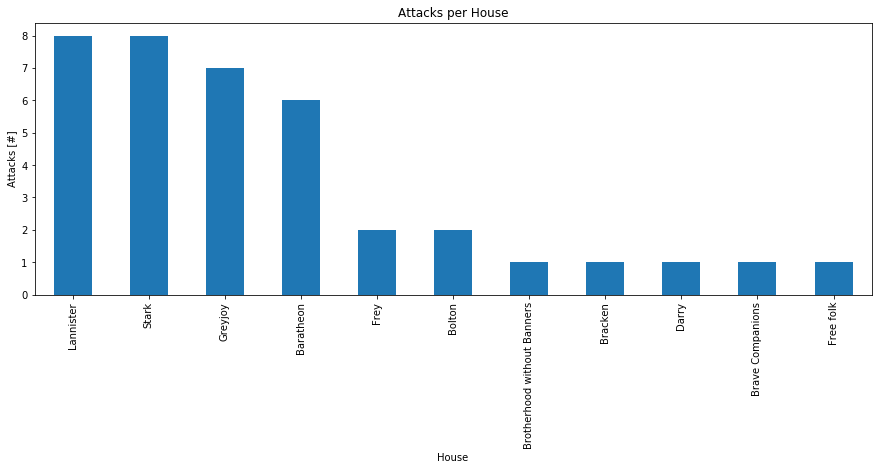

In [5]:
# ----------------------------------------------------------------------
# The Final Plot
# compare the aggressiveness among different houses
# ----------------------------------------------------------------------
# set figure size
fig, ax = plt.subplots(figsize=(15,5))

# count number of attacks for each house
no_of_attacks = battles['attacker_1'].value_counts()

# plot the result
no_of_attacks.plot.bar(title='Attacks per House')
ax.set_xlabel('House')
ax.set_ylabel('Attacks [#]');

### Plots Interpretations

___
<img src="https://vignette.wikia.nocookie.net/gameofthronesfanon/images/e/e4/Robb_Stark.jpg"; style="float: right;" width="100">

#### Upper Left Plot
Robb Stark used to attack with a smaller-size army, comparing with the enemy. He seems like a brave guy with more strategic ideas for his battles.
Another point would be the fact that in 3 out of 4 cases of attacker's defeat, the attacker force outnumbered the defender's; kind of stuff that usually happens in fairy tales. The real world is more cruel and logical.

___

#### Upper Right Plot
While the Greyjoy brothers had never lost a battle they initiated, but Baratheon brothers seem to be more ambitious and pretty successful in pursuing their dreams.

**Note for Weronika & Dorian: I need hepl here! Why a battle should have two names as the 'attacker king'? Does it mean... you know what, just read my 'interpretations' and correct them if they don't make sense based the actual story. Then I can add appropriate pictures here.**

___

#### Middle Left Plot
The 'razing' battles never had casualties among major figures; while 'ambush' attacks are the most successful ones in this reagrd.

___

#### Middle Right Plot
As we see, while the pitched battles are the ones with a relatively high rate of loss, the ambush is the most successful one; surprise, surprise! So if you want to beat your enemies, surprise them. Don't send a message 'see you after school, in the gym'! Even though the 'razing' type has no case of loss, but because data is limited to only two samples of this type of battle, we cannot be sure about its success rate.
Although, the win rate of attackers demonstrate a general weakness of poor 'defence forces' among all the houses. They should work on strengthening their defence forces or develop/improve their deterrence strategy.

Plus, looking at the sizes of the dots which indicate the year of battle, show that 'siege' and especially 'razing' types of battles are a bit more recently developed techniques of battle.

___

#### Lower Left Plot


___

#### Lower Right Plot
Comparing the interest and success rate of a major commander in different types of battle. Each win calculated as +1 and each defeat as -1. Though the values are not normalized by the number of the battle types per commander. Because normalizing them in this way would rub out the information about the interest of the commanders in a specific type of battle.

___

#### Final Plot

___

### Review the Deaths

In [6]:
# take a peek at the deaths data
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


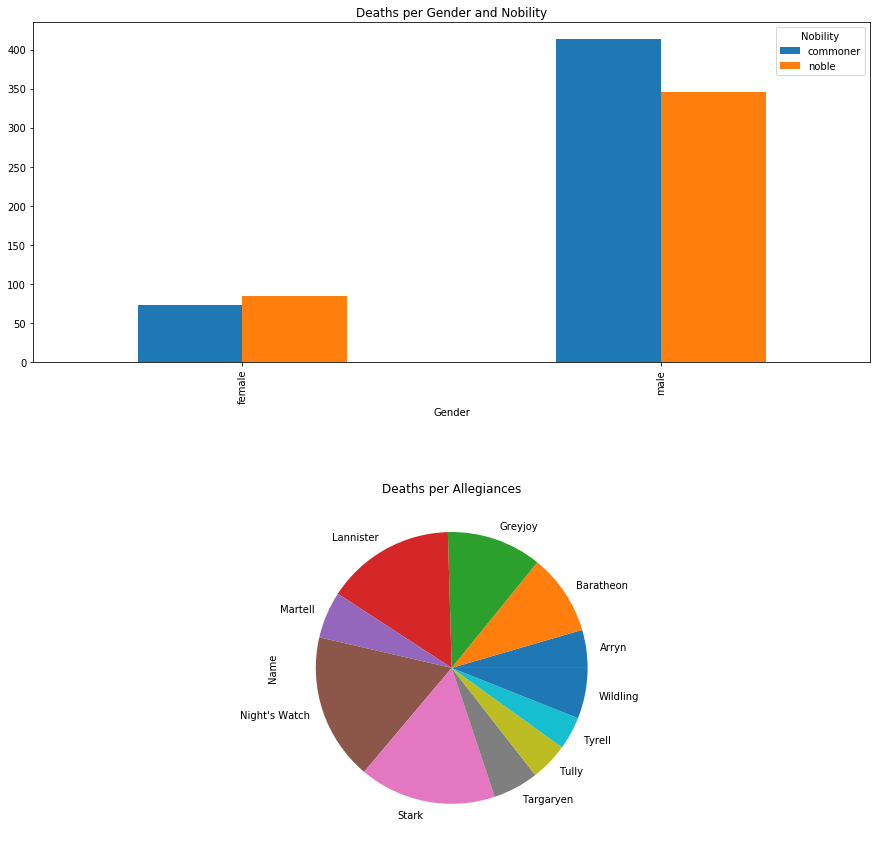

In [7]:
# set figure size
fig, ax = plt.subplots(nrows=2, figsize=(15,15))
plt.subplots_adjust(hspace=0.4)

# replace ones and zeros by respective meanings
deaths.Gender.replace([1, 0], ['male', 'female'], inplace=True)
deaths.Nobility.replace([1, 0], ['noble', 'commoner'], inplace=True)

# count deaths per gender and nobility and plot the result
deaths_gn = deaths.groupby(['Gender', 'Nobility'])['Name'].count().unstack()
deaths_gn.plot(kind='bar', ax=ax[0], title='Deaths per Gender and Nobility')

# drop people with no allegiance
deaths1 = deaths[deaths.Allegiances != 'None']
# count deaths per house
deaths_per_house = deaths1.groupby(['Allegiances'])['Name'].count()

# merge values for each house and drop redundancies
houses = ['Arryn', 'Baratheon', 'Greyjoy', 'Lannister', 'Martell', 'Stark', 'Targaryen', 'Tully', 'Tyrell']
labels=[]
for house in houses:
    deaths_per_house[house] = deaths_per_house[house] + deaths_per_house['House ' + house]
    labels.append('House ' + house)
dph = deaths_per_house.drop(labels)

# create pie plot of deaths per allegiance
dph.plot(kind='pie', ax=ax[1])
plt.title('Deaths per Allegiances');

### Plots Interpretations

___
#### First Plot

___
#### Second Plot

___

### Review the Prediction and Feature Correlations Among Dead and Living Characters

In [8]:
# take a peek at the predection data
predictions.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


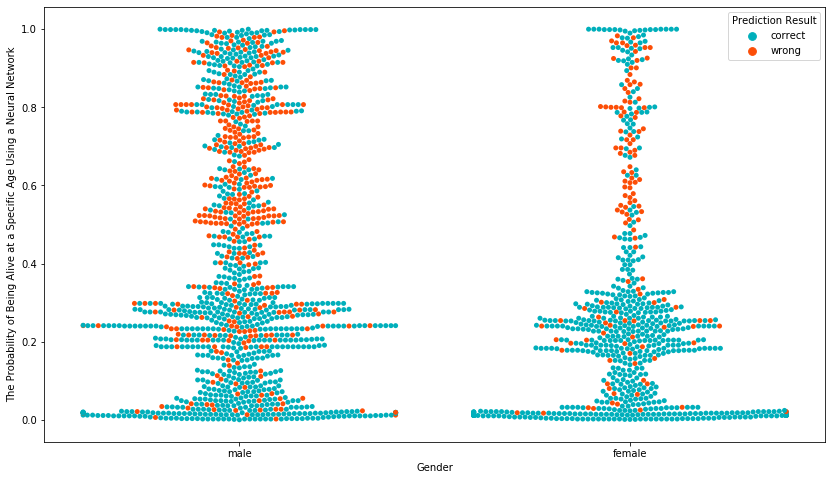

In [14]:
# codes here
# use swarmplot
# use stripplot
'''checking the rate successful predictions.
check the death rate title.
check meaningful correlations between dead and alive characters. '''

fig, ax = plt.subplots(figsize=(14,8))

predictions_pre = predictions.copy()
predictions_pre['Death Prediction Result'] = np.abs(predictions.actual - predictions.pred)
predictions_pre.male.replace([1, 0], ['male', 'female'], inplace=True)
predictions_pre['Death Prediction Result'].replace([1, 0], ['wrong', 'correct'], inplace=True)


sns.swarmplot(data=predictions_pre, x='male', y='plod', hue='Death Prediction Result',
              palette = ('#00AFBB', '#FC4E07'), ax=ax)

ax.set_xlabel('Gender')
ax.set_ylabel('The Probability of Death at a Specific Age, Using a Neural Network');

### Plot Interpretation

___

